# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

This notebook demonstrates how to access and explore Dandiset 001174, which contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) of rhesus macaques.

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Dandiset Overview

This Dandiset contains calcium imaging data from four rhesus macaques during rest and an arm reaching task. The study aimed to examine activity patterns of projection neurons in deep layers of SMA and M1.

**Dandiset URL:** https://dandiarchive.org/dandiset/001174/0.250331.2218

## Notebook Contents

This notebook will cover:

1. Loading the Dandiset and listing its assets.
2. Loading and exploring an example NWB file from the Dandiset.
3. Visualizing calcium imaging data and spatial footprints.

## Required Packages

This notebook requires the following packages:

- `dandi`
- `h5py`
- `remfile`
- `pynwb`
- `numpy`
- `matplotlib`
- `seaborn`

Please ensure these packages are installed in your Python environment.

## Loading the Dandiset and Assets

We can use the `dandi` Python client to access information about the Dandiset and list its assets directly from the DANDI archive.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Exploring an Example NWB File

The Dandiset contains several NWB files, each representing a recording session. We will load one of these files to demonstrate how to access the data within it.

For this example, we will explicitly use the NWB file located at `sub-F/sub-F_ses-20240213T110430_ophys.nwb` with asset ID `193fee16-550e-4a8f-aab8-2383f6d57a03`.

The URL for this asset is: `https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/`

We can load this NWB file directly from the DANDI archive using `remfile` and `pynwb`.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style for plots
sns.set_theme()

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file)
# We use a try-except block here in case there's an issue reading the remote file.
try:
    nwb = io.read()
except Exception as e:
    print(f"Error reading NWB file: {e}")
    nwb = None

Now let's examine some of the metadata from the loaded NWB file.

In [3]:
if nwb:
    print(f"Session description: {nwb.session_description}")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session start time: {nwb.session_start_time}")
    print(f"Subject ID: {nwb.subject.subject_id}")
    print(f"Subject species: {nwb.subject.species}")

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
Session start time: 2024-02-13 11:04:30.267000+00:00
Subject ID: F
Subject species: Macaca mulatta


The NWB file contains optical physiology data (`ophys`). Let's explore the contents of the `ophys` module.

**Neurosift Link:** You can explore this NWB file interactively on Neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/&dandisetId=001174&dandisetVersion=draft

### Contents of the NWB file: ophys module

The `ophys` module contains several data interfaces related to optical physiology:

- `OnePhotonSeries`: Raw calcium imaging data.
- `Fluorescence`: Fluorescence data associated with spatial footprints.
- `ImageSegmentation`: Spatial footprints of individual cells.
- `EventAmplitude`: Amplitude of neural events associated with spatial footprints.

```text
└── processing
    └── ophys: Optical physiology data
        ├── data_interfaces
        │   ├── EventAmplitude: RoiResponseSeries
        │   │   └── data: Dataset (shape: (6026, 6), dtype: float64)
        │   ├── Fluorescence: Fluorescence
        │   │   └── roi_response_series
        │   │       └── RoiResponseSeries: RoiResponseSeries
        │   │           └── data: Dataset (shape: (6026, 6), dtype: float32)
        │   └── ImageSegmentation: ImageSegmentation
        │       └── plane_segmentations
        │           └── PlaneSegmentation: PlaneSegmentation
        │               └── image_mask: VectorData (Image masks for each ROI)
        └── description: Optical physiology data obtained by processing raw calcium imaging data
```

### Visualizing Fluorescence Data

We can access the fluorescence data from the `Fluorescence` data interface. This data corresponds to the calcium activity of the segmented neurons over time. The shape of the data is (time_points, neurons).

Fluorescence data shape: 6026 time points, 6 neurons


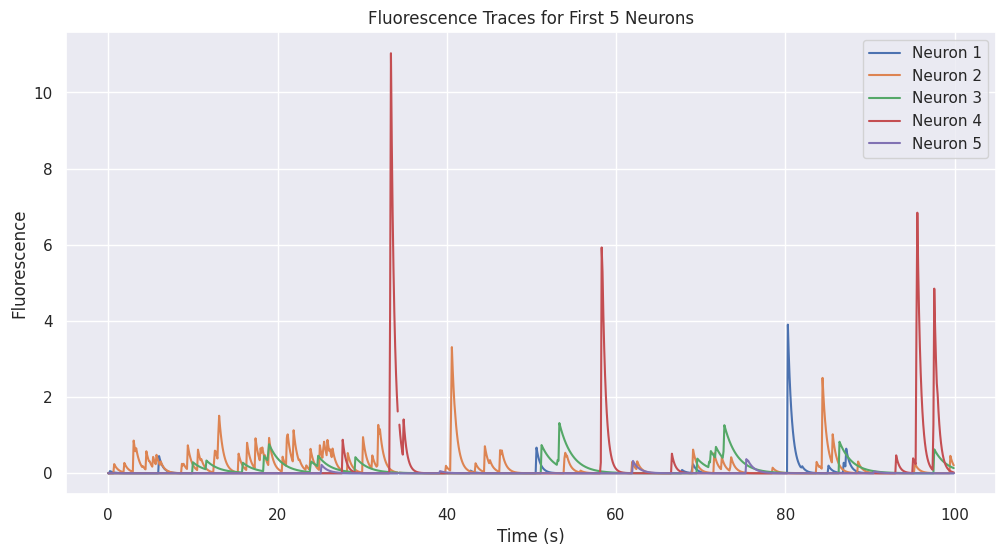

In [4]:
if nwb:
    # Access the fluorescence data
    fluorescence_data = nwb.processing['ophys']['Fluorescence']['RoiResponseSeries'].data

    # Get the number of time points and neurons
    num_time_points, num_neurons = fluorescence_data.shape
    print(f"Fluorescence data shape: {num_time_points} time points, {num_neurons} neurons")

    # Let's plot the fluorescence trace for the first few neurons
    num_neurons_to_plot = min(5, num_neurons)
    time = np.arange(num_time_points) / nwb.acquisition['OnePhotonSeries'].rate # Using raw acquisition rate for time

    plt.figure(figsize=(12, 6))
    for i in range(num_neurons_to_plot):
        # Load a subset of data to avoid excessive memory usage
        plt.plot(time[:1000], fluorescence_data[:1000, i], label=f'Neuron {i+1}')

    plt.xlabel("Time (s)")
    plt.ylabel("Fluorescence")
    plt.title("Fluorescence Traces for First 5 Neurons")
    plt.legend()
    plt.grid(True)
    plt.show()

### Visualizing Spatial Footprints

The `ImageSegmentation` data interface contains the spatial footprints (masks) for each segmented neuron. These masks indicate the pixels corresponding to each neuron.

Image masks shape: (6, 318, 198)


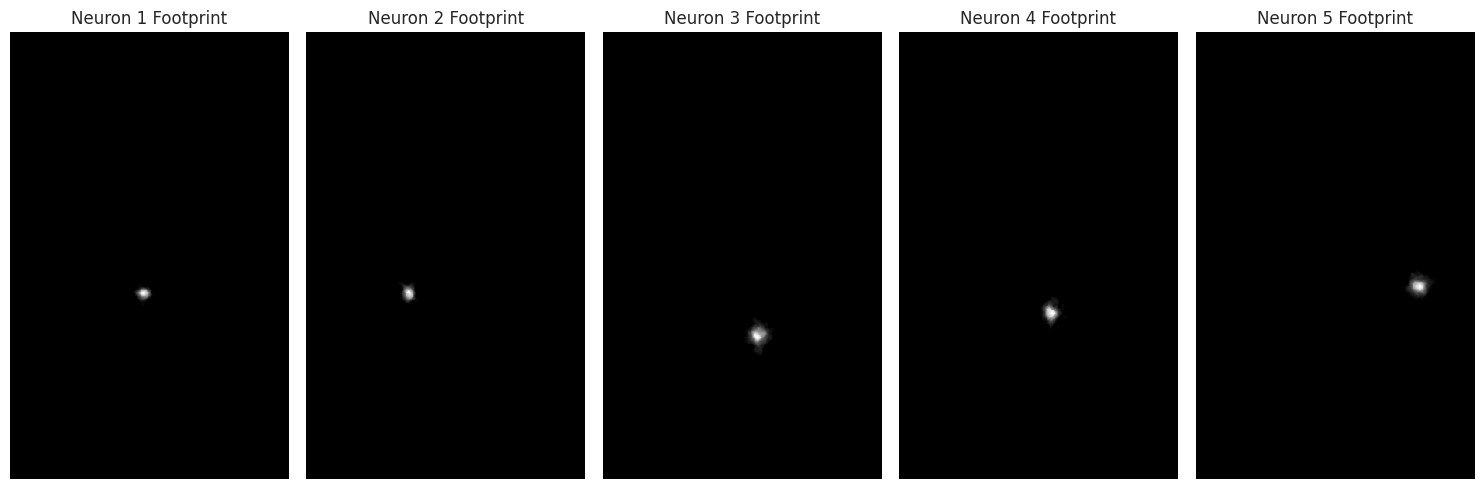

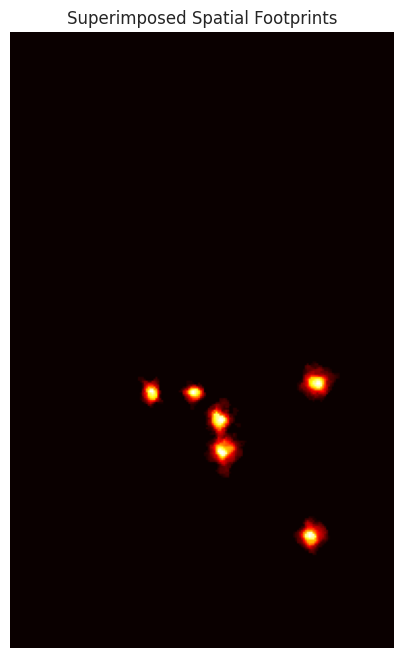

In [5]:
if nwb:
    # Access the plane segmentation table
    plane_segmentation = nwb.processing['ophys']['ImageSegmentation']['PlaneSegmentation']

    # Get the image masks
    image_masks = plane_segmentation.image_mask[:]

    print(f"Image masks shape: {image_masks.shape}")

    # Let's visualize the spatial footprints of the first few neurons
    num_masks_to_plot = min(5, image_masks.shape[0])

    fig, axes = plt.subplots(1, num_masks_to_plot, figsize=(15, 5))
    if num_masks_to_plot == 1:
        axes = [axes] # Make it iterable if there's only one mask
    for i in range(num_masks_to_plot):
        axes[i].imshow(image_masks[i], cmap='gray')
        axes[i].set_title(f'Neuron {i+1} Footprint')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Visualize all spatial footprints superimposed
    # Summing allows seeing overlapping regions. Using np.max can also be an option.
    all_masks_sum = np.sum(image_masks, axis=0)

    plt.figure(figsize=(8, 8))
    plt.imshow(all_masks_sum, cmap='hot')
    plt.title('Superimposed Spatial Footprints')
    plt.axis('off')
    plt.show()

## Summary and Future Directions

This notebook demonstrated how to load and perform basic exploration of the calcium imaging data from Dandiset 001174. We accessed fluorescence traces and visualized the spatial footprints of segmented neurons.

Possible future directions for analysis include:

- Examining the Event Amplitude data.
- Analyzing neural activity in relation to the behavioral task.
- Comparing activity patterns across different neurons and sessions.
- Performing more advanced signal processing and visualization techniques.

In [6]:
if io: # Close the NWB file if it was opened
     io.close()
     # Close the h5py file as well
     if h5_file:
         h5_file.close()
     if remote_file:
         remote_file.close()